## Staggered scheme with displacement relaxation

A staggered scheme is a weakly coupled scheme in which the fluid and solid subproblems are solved only once.

We can devise different staggered schemes by choosing any of the parameters - force, displacement, velocity and acceleration - for prediction-correction steps. Here, we choose the force.

We denote the current time step as $t_{n+1}$, and previous time steps as $t_{n}$ and $t_{n-1}$.


The sequentially-staggered scheme presented in [Förster et al.](https://www.sciencedirect.com/science/article/pii/S0045782506002544) is considered here for demonstration.

The key steps in the staggered scheme are:
* Step 1: Calculate an explicit predictor of the structural displacement: $d^{P}_{n+1}=\psi_1(d_n, \dot{d}_n, \dot{d}_{n-1})$
* Step 2: Compute fluid velocity at the interface to serve as Ditichlet BC: $v^f_{n+1} = \psi_2(d^{P}_{n+1},d^{P}_{n})$
* Step 3: Update the mesh displacement
* Step 4: Solve fluid equations. Here, nothing else to do as we already computed $v^f_{n+1}$
* Step 5: Obtain fluid boundary traction along the interface: $f^f_{n+1} = \mathcal{F}(v^f_{n+1})$
* Step 6: Solve the structural field for the new displacements under consideration of new fluid load: $d^*_{n+1} = \mathcal{S}(f^P)$
* Step 7: Apply relaxation: $d_{n+1} = \beta \, d^*_{n+1} + (1-\beta) \, d^{sP}_{n+1}$
* Step 8: Proceed to next time step

Note that the relaxation step is not present in the original scheme. However, the original scheme is easily recovered by setting $\beta=1$.

***Note that this particular scheme does NOT enforce the velocity BC at the fluid-solid interface. The fluid velocity at the interface calculated in Step 2 is not the same as the velocity of the solid calculated in Step 6. This is a key issue with this scheme.***

Three options are given for the structural predictor:
* Zeroth order: $d^{P0}_{n+1} = d_{n}$
* First order:  $d^{P1}_{n+1} = d_{n} + \Delta t \, \dot{d}_{n}$
* Second order: $d^{P2}_{n+1} = d_{n} + \Delta t \, \left[ \frac{3}{2} \dot{d}_{n} - \frac{1}{2} \dot{d}_{n-1} \right]$

For the sake of presentation and discussions, we denote the generic displacement predictor as $d^{P}$.


Two options are given for computing the fluid velocity (at the interface) from the predicted displacement:
* First order: $v^f_{n+1} = \frac{d^{P}_{n+1} - d^{P}_{n}}{\Delta t}$
* Second order: $v^f_{n+1} = 2 \, \frac{d^{P}_{n+1} - d^{P}_{n}}{\Delta t} - v^f_{n}$

The second order version of velocity is based on the trapezoidal rule. Considering the tendency of the trapezoidal rule to oscillations, it is not recommended and is not pursued here.


Schemes without relaxation have lower stability limit. To improve the stability, a relaxation step is added after *Step 6*. Relaxation parameter $\beta$ is in the range is between 0 and 1, i.e., $\beta \in (0,1]$. $\beta$ dictates the stability of the scheme; it depends on the parameter $\alpha$ (or mass ratio $m^r$).

Note that higher-order schemes have lower stability limits.


## Staggered scheme with backward Euler scheme

Using the backward Euler time integration scheme and displacement predictor, we can write the equations for the staggered scheme as

\begin{align}
d^{P}_{n+1} & = \psi_1(d_n, \dot{d}_n, \dot{d}_{n-1}) \\
v^f_{n+1} &= \psi_2 (d^{P}_{n+1}, d^{P}_{n}) \\
\alpha \, \ddot{d}^*_{n+1} + \omega^2 \, d^*_{n+1} &= f^{s}_{n+1} \\
(1-\alpha) \, \dot{v}^f_{n+1} + 2 \, \xi \, \omega \, v^f_{n+1} &= f^f_{n+1} \\
f^s_{n+1} &= - f^{f}_{n+1} \\
d_{n+1} &= \beta \, d^{*}_{n+1} + (1-\beta) d^{P}_{n+1}
\end{align}


We consider only the undamped case, i.e. $\xi=0$.


### Zeroth-order displacement predictor

For the zeroth-order predictor, the system of equations can be written in the matrix-vector form as,

\begin{align}
\begin{Bmatrix}
d_{n+1} \\ \dot{d}_{n+1} \, \Delta t \\ v^f_{n+1} \, \Delta t \\ d^{P}_{n+1}
\end{Bmatrix}
=
\begin{bmatrix}
\\
\\
\mathbf{A}_{\text{stag-BE}} \\
\\
\end{bmatrix}
\begin{Bmatrix}
d^s_{n} \\ \dot{d}^s_{n} \, \Delta t \\ v^f_{n} \, \Delta t \\ d^{P}_{n}
\end{Bmatrix}
\end{align}


\begin{align}
\mathbf{A}_{\text{stag-BE}} =
\begin{bmatrix}
\frac{\beta \, (2\alpha-1) + (1-\beta) \, Z}{Z}  &  \frac{\alpha \, \beta}{Z}   &   \frac{\beta \, (1-\alpha)}{Z}   &  \frac{\beta \, (1-\alpha)}{Z} \\
%
\frac{\beta \, (\alpha-1-\omega^2 \, \Delta t^2)}{Z}   &   \frac{\alpha \, \beta}{Z}  &   \frac{\beta \, (1-\alpha)}{Z}   &    \frac{\beta \, (1-\alpha)}{Z}   \\
%
1   &    0    &     0     &     -1  \\
%
1   &    0    &     0     &     0
\end{bmatrix}
\end{align}
where $Z=\alpha + \omega^2 \, \Delta t^2$.

As we can observe, the matrix is a function of $\alpha = \alpha(m^r)$. Note that $\alpha=\frac{m^r}{1+m^r}$.

Some important properties of this scheme are:

#### Accuracy
The leading error terms are
\begin{align}
\mathcal{O}(1/\Delta t) &= \omega \, \Big( \beta - 1 \Big), \\
%
\mathcal{O}(1)          &= \omega^2 \, \frac{7 \, (\beta -1)}{2}, \\
%
\mathcal{O}(\Delta t)   & = \omega^3 \, \frac{\alpha (37-31\beta)-12\beta}{6 \, \alpha}
\end{align}

Therefore, the scheme first order accurate for $\beta =1$ and is not even zeroth order accurate for $\beta \neq 1$.


#### Stability
The stability condition is: $0 < \beta \leq \frac{\alpha}{2-3\alpha}$. Therefore, its stability depends on $\alpha$.

Without relaxation, i.e., $\beta=1$, we have
\begin{align}
\alpha &\geq 0.5, \quad \text{or} \quad m^r \geq 1.
\end{align}

#### Numerical damping
The spectral radius at an infinite time step is
\begin{align}
\lim_{\Delta t \rightarrow \infty} \rho(\mathbf{A}) = 1-\beta
\end{align}
Therefore, for $\beta=1$, the numerical damping is the highest. The schemes starts to lose numerical damping capability for $\beta \neq 1$.

Overall, the scheme is first-order accurate for $\beta=1$ and possesses highest numerical damping. However, for $\beta \neq 1$, the scheme loses numerical damping capability and it is ***not even zeroth-order accurate***.

### First-order displacement predictor

The amplification matrix for the ***first-order predictor*** and the undamped case ($\xi=0$) is given as
\begin{align}
\mathbf{A}_{\text{stag-BE}} =
\begin{bmatrix}
\frac{\beta \, (2\alpha-1) + (1-\beta) \, Z}{Z}  &  \frac{\beta \, (2\alpha-1)- Z \, (\beta-1)}{Z}   &   \frac{\beta \, (1-\alpha)}{Z}   &  \frac{\beta \, (1-\alpha)}{Z} \\
%
\frac{\beta \, (\alpha-1-\omega^2 \, \Delta t^2)}{Z}   &   \frac{\beta \, (2\alpha-1)- Z \, (\beta-1)}{Z}  &   \frac{\beta \, (1-\alpha)}{Z}   &    \frac{\beta \, (1-\alpha)}{Z}   \\
%
1   &    1    &     0     &     -1  \\
%
1   &    1    &     0     &     0
\end{bmatrix}
\end{align}
where $Z=\alpha + \omega^2 \, \Delta t^2$.



As we can observe, the matrix is a function of $\alpha = \alpha(m^r)$. Note that $\alpha=\frac{m^r}{1+m^r}$.

Some important properties of this scheme are:

#### Accuracy
The leading error terms are
\begin{align}
\mathcal{O}(1) &= \omega^2 \, \Big( \beta - 1 \Big), \\
%
\mathcal{O}(\Delta t)          &= \omega^3 \, \frac{3 \, \alpha \, (1-\beta) - \beta}{\alpha}
\end{align}

Therefore, the scheme first order accurate for $\beta =1$ and zeroth order accurate for $\beta \neq 1$.

#### Stability
The stability condition is: $0 < \beta \leq \frac{\alpha}{3(1-\alpha)}$. Therefore, its stability depends on $\alpha$.

Without relaxation, i.e., $\beta=1$, we have
\begin{align}
\alpha &\geq 0.75, \quad \text{or} \quad m^r \geq 3.
\end{align}

#### Numerical damping
The spectral radius at an infinite time step is
\begin{align}
\lim_{\Delta t \rightarrow \infty} \rho(\mathbf{A}) = \, \sqrt{1-\beta}
\end{align}

Overall, the scheme is first-order accurate for $\beta=1$ and possesses highest numerical damping. For $\beta \neq 1$, the loses numerical damping ability and is ***only zeroth-order accurate***.



### Second-order displacement predictor
For the second-order predictor, the system of equations can be written in the matrix-vector form as,
\begin{align}
\begin{Bmatrix}
d_{n+1} \\ \dot{d}_{n+1} \, \Delta t \\ v^f_{n+1} \, \Delta t \\ \dot{d}_{n} \, \Delta t \\ d^{P}_{n+1}
\end{Bmatrix}
=
\begin{bmatrix}
\\
\\
\mathbf{A}_{\text{stag-BE}} \\
\\
\\
\end{bmatrix}
\begin{Bmatrix}
d^s_{n} \\ \dot{d}^s_{n} \, \Delta t \\ v^f_{n} \, \Delta t \\ \dot{d}_{n-1} \, \Delta t \\ d^{P}_{n}
\end{Bmatrix}
\end{align}


The amplification matrix for the ***second-order predictor*** and the undamped case ($\xi=0$) is given as
\begin{align}
\mathbf{A}_{\text{stag-BE}} =
\begin{bmatrix}
\frac{\beta \, (2\alpha-1) + (1-\beta) \, Z}{Z}  &  \frac{\beta \, (5\alpha-3)- 3 \, Z \, (\beta-1)}{Z}   &   \frac{\beta \, (1-\alpha)}{Z}    &  \frac{\beta \, (1-\alpha)+Z \, (\beta-1)}{Z}      &  \frac{\beta \, (1-\alpha)}{Z} \\
%
\frac{\beta \, (\alpha-1-\omega^2 \, \Delta t^2)}{Z}   &   \frac{\beta \, (5\alpha-3)- 3 \, Z \, (\beta-1)}{Z}  &   \frac{\beta \, (1-\alpha)}{Z}   &   \frac{\beta \, (1-\alpha)+Z \, (\beta-1)}{Z}      & \frac{\beta \, (1-\alpha)}{Z}   \\
%
1   &    1.5    &    0    &   -0.5     &     -1  \\
%
0   &    1      &    0    &     0      &      0  \\
%
1   &    1.5    &    0    &   -0.5     &      0
\end{bmatrix}
\end{align}

As we can observe, the matrix is a function of $\alpha = \alpha(m^r)$. Note that $\alpha=\frac{m^r}{1+m^r}$.

Some important properties of this scheme are:

#### Accuracy
The leading error terms are
\begin{align}
\mathcal{O}(1) &= \omega^2 \, \Big( \frac{1-\beta}{2} \Big), \\
%
\mathcal{O}(\Delta t)          &= \omega^3 \, \frac{5 \, \alpha \, (\beta-1) + 2\beta}{2\alpha}
\end{align}

Therefore, the scheme first order accurate for $\beta =1$ and zeroth order accurate for $\beta \neq 1$.

When compared against the first-order displacement predictor, the magnitude of the error term is halved; therefore, the error is lower. However, the scheme is still first-order.

#### Stability
The analytical expression for the stability condition is quite complicated to derive. But, it still depends on $\alpha$. Therefore, the stability depends on $\alpha$.

Without relaxation, i.e., $\beta=1$, we have
\begin{align}
\alpha &\geq \frac{5}{6}, \quad \text{or} \quad m^r \geq 5.
\end{align}


#### Numerical damping
The spectral radius at an infinite time step is quite complicated for this scheme. We can only assess it by plotting spectral radii values for different $m^r$ values.

Overall, the scheme is first-order accurate for $\beta=1$, and for $\beta \neq 1$, it is ***only zeroth-order accurate***. Spectral radius is assessed using graphs.

### Summary
In summary, the stability limits and spectral radii values for the three schemes are:

#### Without relaxation ($\beta=1$)

| Predictor type | Stability limit ($\alpha$) | Stability limit ($m^r$)  | Spectral radius at $\Delta t=\infty$ |
|----------------|:--------------------------:|:------------------------:|:------------------------------------:|
| Zeroth-order   |      $\frac{1}{2}$         |            1             |         0       |
|                |                            |                          |                 |
| First-order    |      $\frac{2}{3}$         |            3             |         0       |
|                |                            |                          |                 |
| Second-order   |      $\frac{5}{6}$         |            5             |         -       |
|                |                            |                          |                 |

#### With relaxation ($\beta \neq 1$)

| Predictor type | Stability limit ($\alpha$) | Stability limit ($m^r$)  | Spectral radius at $\Delta t=\infty$|
|----------------|:--------------------------:|:------------------------:|:-----------------------------------:|
| Zeroth-order   |      $\beta \leq \frac{\alpha}{2-3\alpha}$         |            $\beta \leq \frac{m^r}{2-m^r}$             |   $1-\beta$     |
|                |                            |                          |                 |
| First-order    |      $\beta \leq \frac{\alpha}{3-3\alpha}$         |            $\beta \leq \frac{m^r}{3}$             |   $\sqrt{1-\beta}$     |
|                |                            |                          |                 |
| Second-order   |              -             |            -             |        -        |
|                |                            |                          |                 |

### Spectral radii plots


Spectral radii values for the displacemenet predictor schemes can be calcuated using the function call

***specRad = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, predictor_type, beta, logtimestep)***

*predictor_type* is the type of predictor:
* predictor_type=0 for $d^{P0}$
* predictor_type=1 for $d^{P1}$
* predictor_type=2 for $d^{P2}$

#### Mass ratio $m^r=5$ and without relaxation ($\beta=1$)

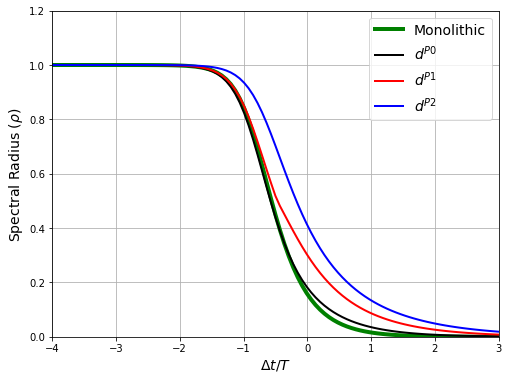

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient


mr = 5;                       # mass ratio


alpha = mr/(1.0+mr);
#beta  = alpha;
beta  = 1.0;


logtimestep = np.linspace(-4, 3, 101)


specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_dP0 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 0, beta, logtimestep)
specRad_dP1 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_dP2 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g', linewidth=4, label="Monolithic")
plt.plot(logtimestep, specRad_dP0, 'k', linewidth=2, label=r"$d^{P0}$")
plt.plot(logtimestep, specRad_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(logtimestep, specRad_dP2, 'b', linewidth=2, label=r"$d^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.legend(fontsize=14)
plt.grid()
plt.show()

For $m^r=5$ and $\beta=1$, spectral radius is less than or equal to one for all the schemes. Therefore, all the schemes are stable in this case.

#### Mass ratio $m^r=3$ and without relaxation ($\beta=1$)

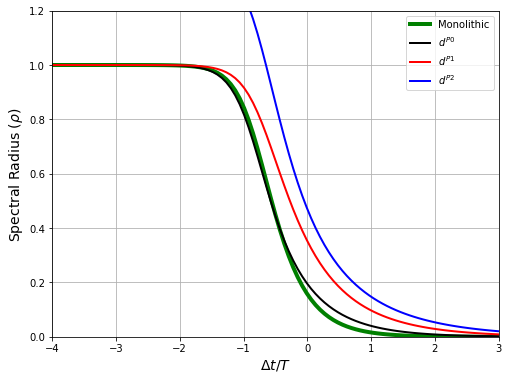

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient


mr = 3;                       # mass ratio


alpha = mr/(1.0+mr);
#beta  = alpha;
beta  = 1.0;


logtimestep = np.linspace(-4, 3, 101)


specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_dP0 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 0, beta, logtimestep)
specRad_dP1 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_dP2 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g', linewidth=4, label="Monolithic")
plt.plot(logtimestep, specRad_dP0, 'k', linewidth=2, label=r"$d^{P0}$")
plt.plot(logtimestep, specRad_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(logtimestep, specRad_dP2, 'b', linewidth=2, label=r"$d^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.legend()
plt.grid()
plt.show()

For $m^r=3$ and $\beta=1$, spectral radius is less than or equal to one only for $d^{P0}$ and $d^{P1}$ but greater than one for $d^{P2}$. Therefore, $d^{P2}$ scheme is unstable in this case.

#### Mass ratio $m^r=1$ and without relaxation ($\beta=1$)

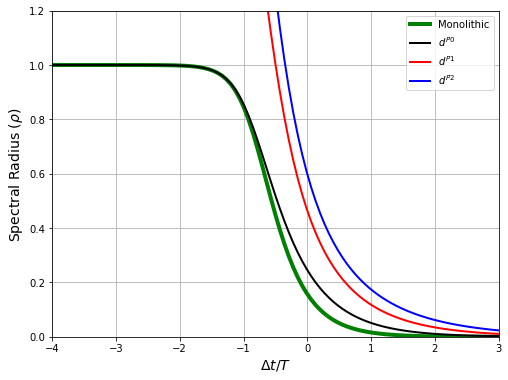

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient


mr = 1;                       # mass ratio


alpha = mr/(1.0+mr);
#beta  = alpha;
beta  = 1.0;


logtimestep = np.linspace(-4, 3, 101)


specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_dP0 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 0, beta, logtimestep)
specRad_dP1 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_dP2 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g', linewidth=4, label="Monolithic")
plt.plot(logtimestep, specRad_dP0, 'k', linewidth=2, label=r"$d^{P0}$")
plt.plot(logtimestep, specRad_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(logtimestep, specRad_dP2, 'b', linewidth=2, label=r"$d^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.legend()
plt.grid()
plt.show()

For $m^r=1$ and $\beta=1$, spectral radius is less than or equal to one only for $d^{P0}$ but greater than one for and $d^{P1}$ and $d^{P2}$. Therefore, and $d^{P1}$ and $d^{P2}$ schemes are unstable in this case.

#### Mass ratio $m^r=0.5$ and without relaxation ($\beta=1$)

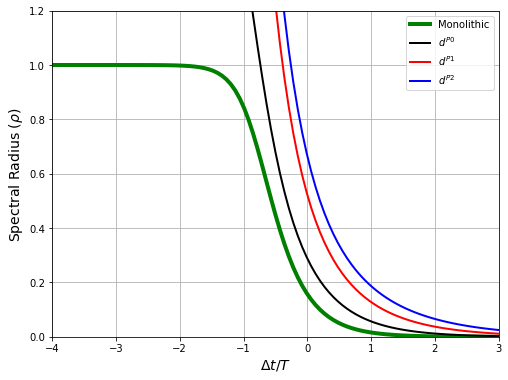

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient


mr = 0.5;                       # mass ratio


alpha = mr/(1.0+mr);
#beta  = alpha;
beta  = 1.0;


logtimestep = np.linspace(-4, 3, 101)


specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_dP0 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 0, beta, logtimestep)
specRad_dP1 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_dP2 = spectralRadius_staggered_displcementrelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g', linewidth=4, label="Monolithic")
plt.plot(logtimestep, specRad_dP0, 'k', linewidth=2, label=r"$d^{P0}$")
plt.plot(logtimestep, specRad_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(logtimestep, specRad_dP2, 'b', linewidth=2, label=r"$d^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.legend()
plt.grid()
plt.show()

For $m^r=0.5$ and $\beta=1$, spectral radius is greater than one for all the three staggered schemes based on displacement predictors. Therefore, and $d^{P0}$, $d^{P1}$ and $d^{P2}$ schemes are unstable in this case.

### Numerical solutions with different predictors

#### Mass ratio $m^r=5$

Klocal = 33372.811751 

Klocal = 33372.811751 

Klocal = 33372.811751 



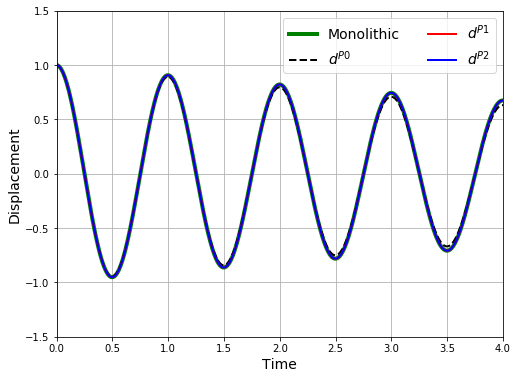

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 4*T+dt, dt)


mr = 5;                       # mass ratio

beta  = 1.0;


# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with the staggered schemes
disp_dP0, velo_dP0 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 0, beta, timesteparray)
disp_dP1, velo_dP1 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 1, beta, timesteparray)
disp_dP2, velo_dP2 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 2, beta, timesteparray)


plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono, 'g', linewidth=4, label="Monolithic")
plt.plot(timesteparray, disp_dP0, 'k--', linewidth=2, label=r"$d^{P0}$")
plt.plot(timesteparray, disp_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(timesteparray, disp_dP2, 'b', linewidth=2, label=r"$d^{P2}$")

plt.xlabel("Time", fontsize=14)
plt.ylabel("Displacement", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2, fontsize=14)
plt.grid()
plt.show()

For $m^r=5$ and $\beta=1$, all the schemes are stable. However, the accuracy of $d^{P0}$ is lower that of $d^{P1}$ and $d^{P2}$ as expected.

#### Mass ratio $m^r=1$

Klocal = 20039.478418 

Klocal = 20039.478418 

Klocal = 20039.478418 



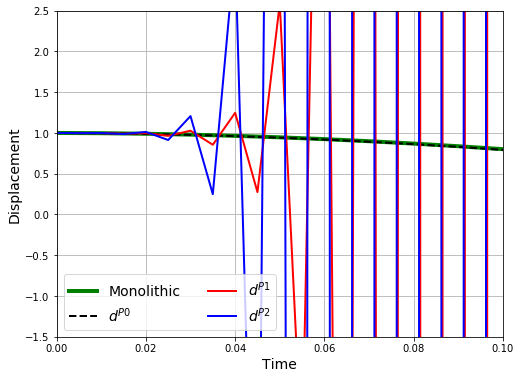

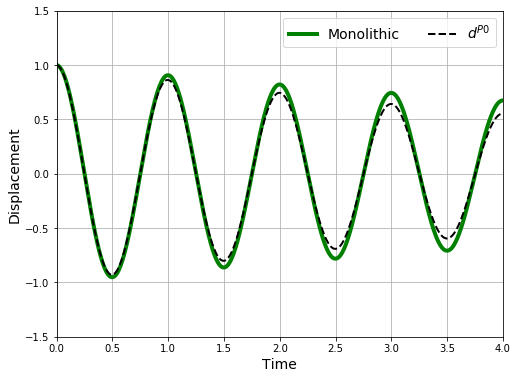

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 4*T+dt, dt)


mr = 1;                       # mass ratio

beta  = 1.0;


# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with the staggered schemes
disp_dP0, velo_dP0 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 0, beta, timesteparray)
disp_dP1, velo_dP1 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 1, beta, timesteparray)
disp_dP2, velo_dP2 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 2, beta, timesteparray)


plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono, 'g', linewidth=4, label="Monolithic")
plt.plot(timesteparray, disp_dP0, 'k--', linewidth=2, label=r"$d^{P0}$")
plt.plot(timesteparray, disp_dP1, 'r', linewidth=2, label=r"$d^{P1}$")
plt.plot(timesteparray, disp_dP2, 'b', linewidth=2, label=r"$d^{P2}$")

plt.xlabel("Time", fontsize=14)
plt.ylabel("Displacement", fontsize=14)
#plt.xlim([min(timesteparray), max(timesteparray)])
plt.xlim([0.0, 0.1])
plt.ylim([-1.5, 2.5])
plt.legend(ncol=2, fontsize=14)
plt.grid()
plt.show()


plt.figure(1,figsize=(8,6))
plt.plot(timesteparray, dispMono, 'g', linewidth=4, label="Monolithic")
plt.plot(timesteparray, disp_dP0, 'k--', linewidth=2, label=r"$d^{P0}$")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Displacement", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
#plt.xlim([0.0, 0.1])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2, fontsize=14)
plt.grid()
plt.show()

Thus, for $m^r=1$ and $\beta=1$, both $d^{P1}$ and $d^{P2}$ are unstable. The solution quickly blows up. While $d^{P0}$ is stable, its accuracy is poor.

Klocal = 20039.478418 

Klocal = 125039.478418 



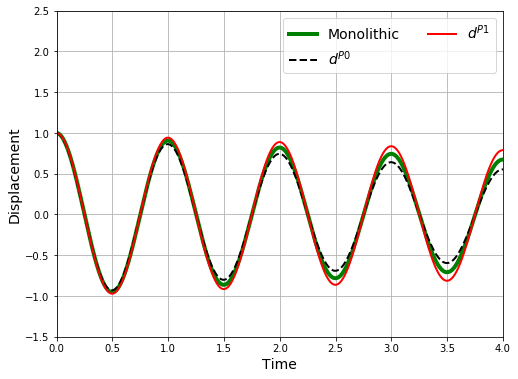

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 4*T+dt, dt)


mr = 1;                       # mass ratio

beta  = 1.0;


# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with the staggered schemes
disp_dP0, velo_dP0 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 0, beta, timesteparray)

dt = T/500.0;

timesteparray2 = np.arange(0.0, 4*T+dt, dt)
disp_dP0_2, velo_dP0_2 = solution_staggered_displacementrelaxation_BE(m, c, k, mr, 0, beta, timesteparray2)


plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono, 'g', linewidth=4, label="Monolithic")
plt.plot(timesteparray, disp_dP0, 'k--', linewidth=2, label=r"$d^{P0}$")
plt.plot(timesteparray2, disp_dP0_2, 'r', linewidth=2, label=r"$d^{P1}$")

plt.xlabel("Time", fontsize=14)
plt.ylabel("Displacement", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
#plt.xlim([0.0, 0.1])
plt.ylim([-1.5, 2.5])
plt.legend(ncol=2, fontsize=14)
plt.grid()
plt.show()
